
# Step 1: Loading the Dataset:

### 1. Library Imports & Loading the Dataset:

- In this initial step, we import the required libraries, setting the stage for machine learning tasks.

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pickle

### 2. Loading and Inspecting Titanic Dataset

In [10]:
data = pd.read_csv('./titanicEncoded.csv')
data.columns

Index(['Unnamed: 0', 'survived', 'age', 'fare', 'body', 'boat_1', 'boat_10',
       'boat_11', 'boat_12', 'boat_13', 'boat_14', 'boat_15', 'boat_16',
       'boat_2', 'boat_3', 'boat_4', 'boat_5', 'boat_6', 'boat_7', 'boat_8',
       'boat_9', 'boat_A', 'boat_B', 'boat_C', 'boat_D', 'boat_Unknown',
       'sex_female', 'sex_male', 'age_category_Adult', 'age_category_Kid',
       'age_category_Senior', 'age_category_Young Adult'],
      dtype='object')

The dataset contains various columns, each representing different attributes related to the passengers on the Titanic. 

- 'survived': Indicates whether the passenger survived (1) or did not survive (0).
- 'fare': The fare paid by the passenger.
- 'body': This column indicates whether the deceased passengers had their bodies recovered (1) or not (0).
- 'boat_1' to 'boat_Unknown': These columns represent information about the lifeboats used by passengers during the Titanic disaster.
- 'sex_female' and 'sex_male': Indicates the gender of the passengers.
- 'age_category_Adults', 'age_category_Kids', 'age_category_Seniors', and 'age_category_Young Adults': Categorizes passengers based on their age.


# Step 2: Data Preparation and Feature Selection

## 1. Data Splitting and Feature Selection

The Dataset is being prepared for machine learning tasks, specifically for predictive modeling.

In [11]:
# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=["survived", "Unnamed: 0"])
y = data["survived"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1. **Splitting into Features (X) and Target Variable (y):** The first step involves splitting the dataset into two parts: 
   - `X` contains the features used for making predictions, the features are extracted by dropping the "survived" and "Unnamed: 0" columns from the original dataset.
   - `y` represents the target variable, which is what we want to predict. In this case, it's "survived," indicating whether a passenger survived (1) or not (0).

2. **Splitting into Training and Testing Sets:** Next, split the data into training and testing sets.
   - `X_train` and `y_train` contain the feature and target variable for the training set.
   - `X_test` and `y_test` contain the feature and target variable for the testing set.
   - The `train_test_split` function is used for this purpose. The data is divided into an 80% training set and a 20% testing set, as specified by the `test_size=0.2` parameter. The `random_state` parameter is set to 42 to ensure reproducibility of the split.


## Step 3: Training a model

## 1. Random Forest Classifier

In [12]:

# Initialize the Random Forest classifier and train it on the training set
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

1. **Initialization of Random Forest Classifier:**

   - A Random Forest classifier is created and stored in the variable `rf_classifier`. 
   - The `n_estimators` parameter is set to 100, which indicates the number of decision trees to be included in the ensemble. This parameter controls the complexity of the Random Forest.
   - The `random_state` parameter is set to 42, ensuring that the random initialization of the classifier is reproducible.

2. **Training the Classifier:**
   - The `fit` method is called on the `rf_classifier` to train the model. It is provided with the training data, `X_train` (features), and `y_train` (target variable). This process involves creating multiple decision trees, each trained on a different subset of the data (bagging), and then combining their predictions to make more accurate predictions.


## 2. Model Evaluation Results

Displaying results of the performance of the Random Forest classifier on the testing data.

In [13]:
# Predict the target values for the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)


Accuracy: 0.9732824427480916

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       144
           1       0.99      0.95      0.97       118

    accuracy                           0.97       262
   macro avg       0.98      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



**1. Accuracy:** 
- The accuracy of the model's predictions on the testing set is 0.97, which means that it correctly predicts the outcome for approximately 97.32% of the cases. This is a measure of the overall correctness of the classifier's predictions.

**2. Classification Report:**
- The classification report provides a detailed assessment of the model's performance for each class (survived and not survived).
- For the "survived" class (1):

  - Precision: 0.99, indicating that 99% of the predicted survivors were correct.
  - Recall: 0.95, which means that the model identified 95% of the actual survivors.
  - F1-score: 0.97, a harmonic mean of precision and recall.
  - Support: 118, the number of instances in this class.

- For the "not survived" class (0):

  - Precision: 0.96, meaning that 96% of the predicted non-survivors were correct.
  - Recall: 0.99, indicating that the model identified 99% of the actual non-survivors.
  - F1-score: 0.98, a harmonic mean of precision and recall.
  - Support: 144, the number of instances in this class.

- The overall accuracy, as well as the macro and weighted averages of precision, recall, and F1-score, are also provided to summarize the model's performance across both classes. 

**3. Confusion Matrix:**

A confusion matrix is generated to visualize the performance of the Random Forest classifier, specifically in the context of binary classification (survived and not survived).

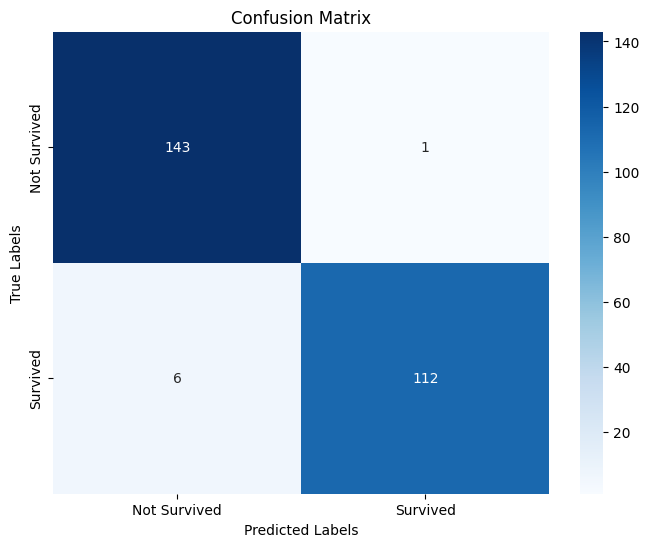

In [14]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Confusion Matrix:**
- The confusion matrix is a table that shows how the model's predictions compare to the actual ground truth. It is commonly used in binary classification problems like this one.
- The matrix is organized as follows:

  - True Negative (Top-left corner): passengers that were correctly predicted as not having survived.
  - False Positive (Top-right corner):  passengers that were incorrectly predicted as having survived when they did not.
  - False Negative (Bottom-left corner):  passengers that were incorrectly predicted as not having survived when they did.
  - True Positive (Bottom-right corner):  passengers that were correctly predicted as having survived.

**Interpretation:**
- True Negatives and True Positives are correct predictions.
- False Positives are instances where the model predicted survival incorrectly.
- False Negatives are instances where the model predicted non-survival incorrectly.

## 3. A Peek Under the Hood: Visualizing Individual Decision Tree

We visualize three individual decision trees from the Random Forest ensemble.

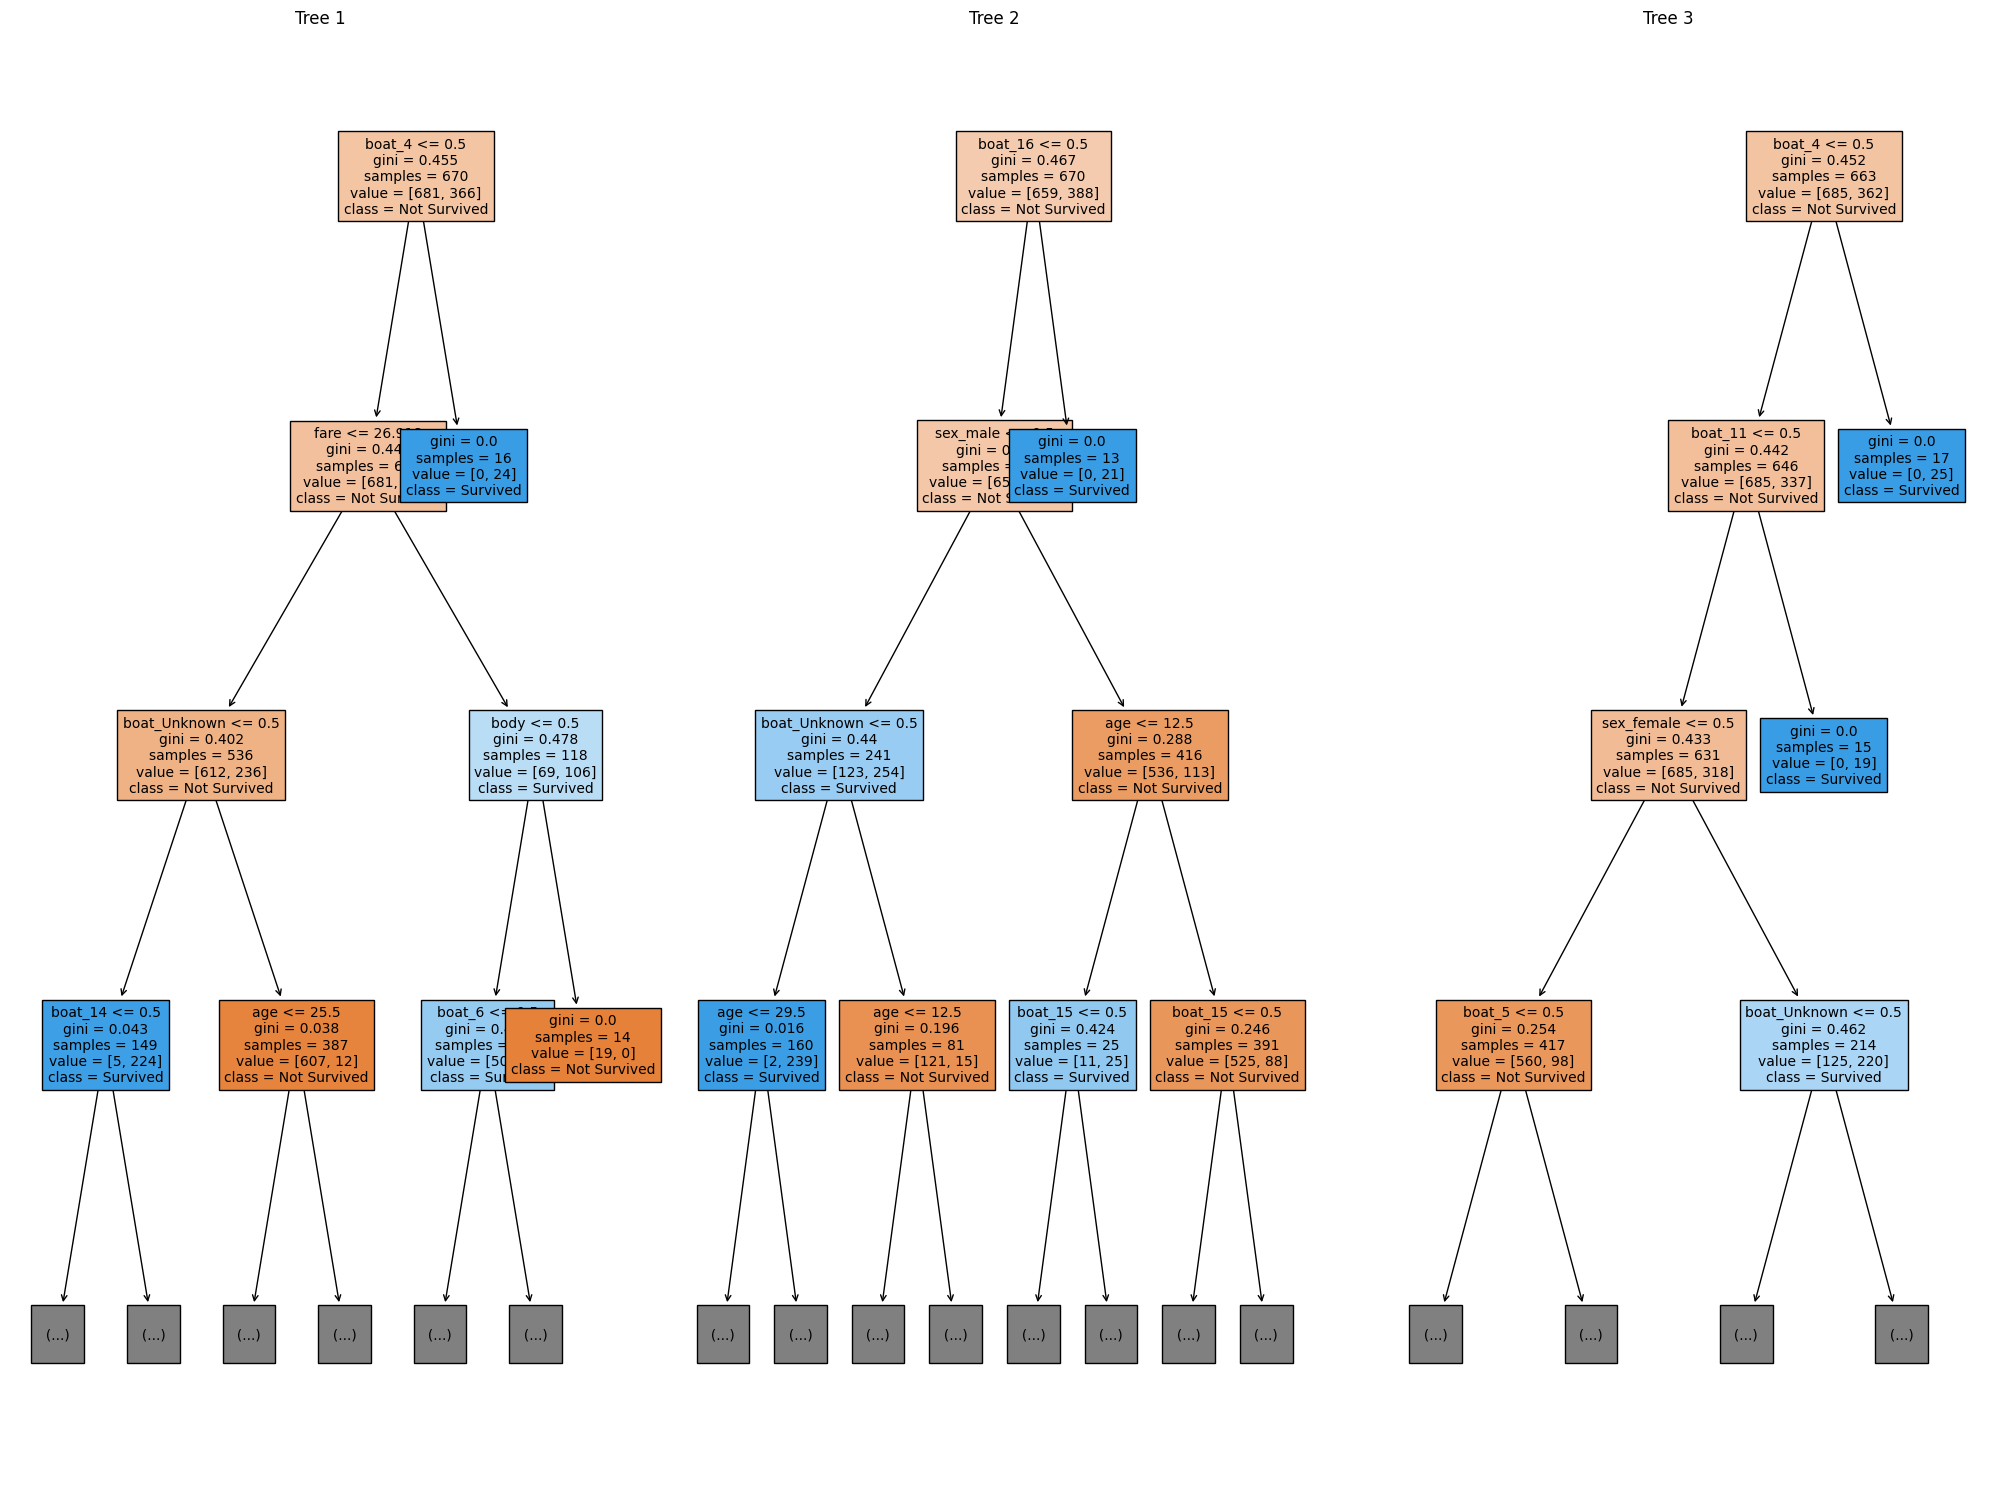

In [15]:
# Number of trees to visualize
num_trees = 3

# Plot the individual decision trees
plt.figure(figsize=(20, 15))

for i in range(num_trees):
    plt.subplot(1, num_trees, i + 1)
    plot_tree(rf_classifier.estimators_[i], 
              filled=True, 
              feature_names=X.columns, 
              class_names=['Not Survived', 'Survived'], 
              max_depth=3, # Limiting tree depth for visualization purposes
              fontsize=10)
    plt.title(f"Tree {i + 1}")

plt.tight_layout()
plt.show()

**Tree Structure:**

The trees have different rules and conditions to classify passengers as 'Not Survived' or 'Survived.'
Each tree makes decisions based on specific features and data subsets.

# 4. Save Model

In [16]:


# Assuming `model` is your trained model object
with open('titanic_randomForest.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)
